<a href="https://colab.research.google.com/github/Nscaglio/4105_project/blob/main/LC_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SECTION 0: File set-up and confirmation
from copy import copy, deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import math
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import matplotlib.patches as patches
import geopy.distance

In [ ]:
# Pull training data from csv
csv = '/content/fraud test.csv'

df = pd.read_csv(csv)

pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Training and validation split
# randomize the training and validation data split for Housing set
np.random.seed(0)
df_train, df_validate = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Pull latitude and longitude points from training and validation sets
XTI = np.delete(df_train, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22], axis=1)
XTF = np.delete(df_train, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22], axis=1)
XVI = np.delete(df_validate, [0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22], axis=1)
XVF = np.delete(df_train, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22], axis=1)

# Calculate distance based on latitude and longitude (Can take a couple minutes)
distance_train = np.ones((444575, 1))
distance_validate = np.ones((111144,1))

for i in range(0, 444574):
  distance_train[i] = geopy.distance.geodesic(XTI[i], XTF[i]).km

for n in range(0, 111143):
  distance_validate[n] = geopy.distance.geodesic(XVI[n], XVF[n]).km

In [ ]:
# Pull is fraud column from training and validation sets
YT = df_train.iloc[:, 22].values
YV = df_validate.iloc[:, 22].values

# Pull remaining inputs from training and validation sets (Amt, unix time)
XT1 = np.delete(df_train, [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22], axis=1)
XV1 = np.delete(df_validate, [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22], axis=1)

# Combine inputs (Amount of Purchase, Time, Distance between Home and Merchant)
XT = np.concatenate((XT1, distance_train), axis=1)
XV = np.concatenate((XV1, distance_validate), axis=1)

print(XT[0])

[63.22 1383470059 79.40727962603923]


In [ ]:
# Standardize data set
object = StandardScaler()
XT = object.fit_transform(XT)
XV = object.fit_transform(XV)

print(XT[0])

[-0.03960553  0.53696067  0.11377488]


In [ ]:
# Implement Logistic regression model
clf = LogisticRegression(C=0.00001, class_weight='balanced')
Model1 = clf.fit(XT, YT)
Pred1 = Model1.predict(XV)
matrix1 = confusion_matrix(YV, Pred1)
A1 = metrics.accuracy_score(YV, Pred1)
P1 = metrics.precision_score(YV, Pred1)
R1 = metrics.recall_score(YV, Pred1)

Text(0.5, 427.9555555555555, 'Predicted label')

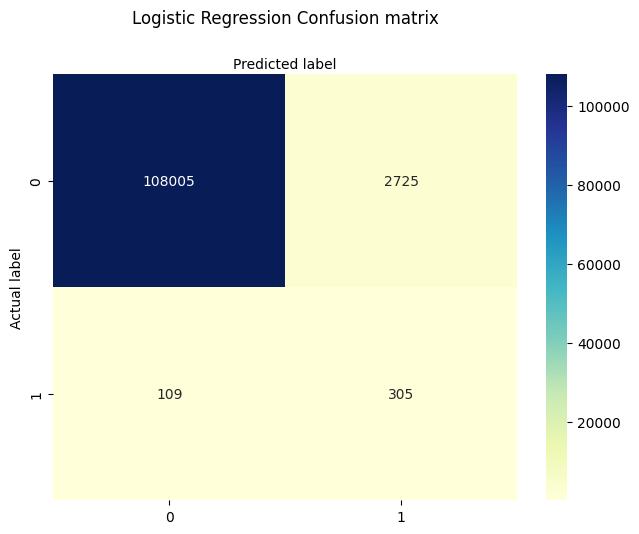

In [ ]:
# Display confusion matrix for logistic regression
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Logistic accuracy =", A1)
print("Logistic precision =", P1)
print("Logistic recall =", R1)

Logistic accuracy = 0.9745015475419276
Logistic precision = 0.10066006600660066
Logistic recall = 0.7367149758454107


In [ ]:
# Implement Naive Bayes regression
gnb = GaussianNB(priors=[0.25,0.75])
Model2 = gnb.fit(XT, YT)
Pred2 = Model2.predict(XV)
matrix2 = confusion_matrix(YV, Pred2)
A2 = metrics.accuracy_score(YV, Pred2)
P2 = metrics.precision_score(YV, Pred2)
R2 = metrics.recall_score(YV, Pred2)

Text(0.5, 427.9555555555555, 'Predicted label')

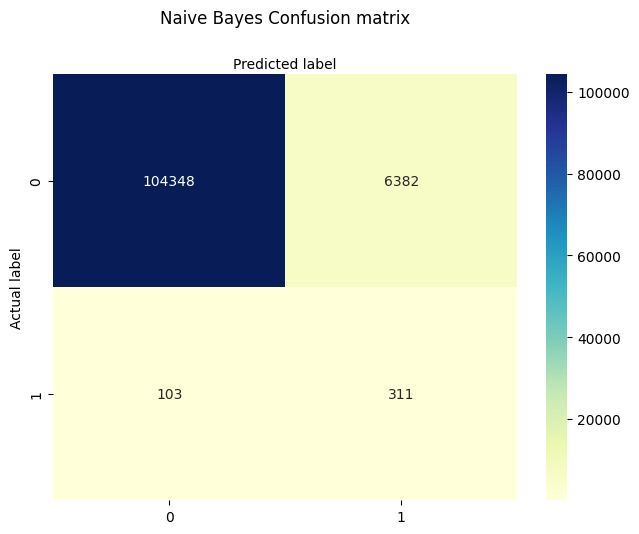

In [ ]:
# Display confusion matrix for naive bayes
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Bayes accuracy =", A2)
print("Bayes precision =", P2)
print("Bayes recall =", R2)

Bayes accuracy = 0.9416522709278053
Bayes precision = 0.046466457492903034
Bayes recall = 0.751207729468599


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict

XTT = torch.tensor(XT[0:100000], dtype=torch.float32)
XVT = torch.tensor(XV[0:10000], dtype=torch.float32)
YTT = torch.tensor(YT[0:10000], dtype=torch.float32)
YVT = torch.tensor(YV[0:10000], dtype=torch.float32)

In [ ]:
# Define gradient decent function
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val, div):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % div == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [ ]:
# Intialize model sequence
seq_modelH1 = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.Tanh(),
            nn.Linear(8, 1),
            nn.LogSoftmax(dim=1))
seq_modelH1

Sequential(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): Tanh()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
for name, param in seq_modelH1.named_parameters():
    print(name, param.shape)

0.weight torch.Size([16, 3])
0.bias torch.Size([16])
2.weight torch.Size([8, 16])
2.bias torch.Size([8])
4.weight torch.Size([1, 8])
4.bias torch.Size([1])


In [ ]:
# Initialize optimizer, and epochs for housing set
optimizer = optim.SGD(seq_modelH1.parameters(), lr=0.01)
n_epochs = 200;

# Run training loop
training_loop(n_epochs, optimizer, seq_modelH1, nn.MSELoss(), XTT, XVT, YTT, YVT, 10)

print()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([100000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 0.0040, Validation loss 0.0033
Epoch 10, Training loss 0.0040, Validation loss 0.0033
Epoch 20, Training loss 0.0040, Validation loss 0.0033
Epoch 30, Training loss 0.0040, Validation loss 0.0033
Epoch 40, Training loss 0.0040, Validation loss 0.0033
Epoch 50, Training loss 0.0040, Validation loss 0.0033
Epoch 60, Training loss 0.0040, Validation loss 0.0033
Epoch 70, Training loss 0.0040, Validation loss 0.0033


KeyboardInterrupt: 